In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
from matplotlib import pyplot as plt

In [9]:
data = pd.read_csv('waste-levels1.csv')
data

,rank,country,waste_generated,annual_percapita_kg1,recycling,annual_percapita_kg2,incineration,annual_percapita_kg3,landfill,annual_percapita_kg4,open_dump,annual_percapita_kg5,Unnamed: 12,unaccounted waste,final_score
0,1,Turkey,1.11,425,0.00,0,0.00,0,1.49,216,10.00,176,0.59,4,0.00
1,2,Latvia,1.25,438,1.69,93,0.00,0,1.72,250,0.00,0,10.00,68,11.63
2,3,New Zealand,4.17,727,0.00,0,0.00,0,5.00,727,0.00,0,0.00,0,24.37
3,4,Mexico,1.08,421,0.38,21,0.00,0,2.16,314,5.03,89,0.00,0,32.15
4,5,Chile,0.73,387,0.03,1,0.00,1,2.27,330,1.86,33,3.04,21,32.19
5,6,Italy,1.76,489,2.31,127,0.37,92,0.89,129,0.00,0,7.89,54,32.28
6,7,Estonia,0.45,360,1.62,89,0.74,185,0.18,27,0.00,0,6.83,46,48.98
7,8,Canada,3.96,706,2.65,145,0.08,21,3.51,511,0.00,0,0.00,0,51.19
8,9,Slovak Republic,0.64,378,0.52,29,0.14,35,1.55,226,0.00,0,2.74,19,54.10
9,10,Israel,3.34,644,2.93,161,0.00,0,3.33,483,0.00,0,0.00,0,57.35


In [10]:
data.head(10)

,rank,country,waste_generated,annual_percapita_kg1,recycling,annual_percapita_kg2,incineration,annual_percapita_kg3,landfill,annual_percapita_kg4,open_dump,annual_percapita_kg5,Unnamed: 12,unaccounted waste,final_score
0,1,Turkey,1.11,425,0.00,0,0.00,0,1.49,216,10.00,176,0.59,4,0.00
1,2,Latvia,1.25,438,1.69,93,0.00,0,1.72,250,0.00,0,10.00,68,11.63
2,3,New Zealand,4.17,727,0.00,0,0.00,0,5.00,727,0.00,0,0.00,0,24.37
3,4,Mexico,1.08,421,0.38,21,0.00,0,2.16,314,5.03,89,0.00,0,32.15
4,5,Chile,0.73,387,0.03,1,0.00,1,2.27,330,1.86,33,3.04,21,32.19
5,6,Italy,1.76,489,2.31,127,0.37,92,0.89,129,0.00,0,7.89,54,32.28
6,7,Estonia,0.45,360,1.62,89,0.74,185,0.18,27,0.00,0,6.83,46,48.98
7,8,Canada,3.96,706,2.65,145,0.08,21,3.51,511,0.00,0,0.00,0,51.19
8,9,Slovak Republic,0.64,378,0.52,29,0.14,35,1.55,226,0.00,0,2.74,19,54.10
9,10,Israel,3.34,644,2.93,161,0.00,0,3.33,483,0.00,0,0.00,0,57.35


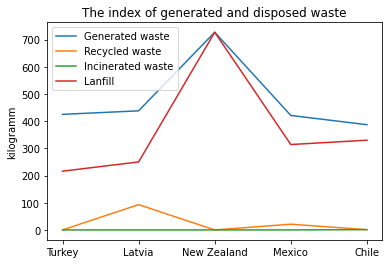

In [22]:
short_data = data.head(5)

countries = short_data['country']
waste = short_data['annual_percapita_kg1']
recycling = short_data['annual_percapita_kg2']
incineration =short_data['annual_percapita_kg3']
landfill = short_data['annual_percapita_kg4']
plt.plot(countries, waste, label = 'Generated waste')
plt.plot(recycling, label = 'Recycled waste')
plt.plot(incineration, label = 'Incinerated waste')
plt.plot(landfill, label = 'Lanfill')
plt.legend()
plt.ylabel('kilogramm')

plt.title('The index of generated and disposed waste')
plt.show()

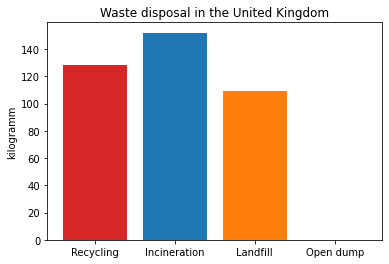

In [14]:
fig, ax = plt.subplots()

uk=data.groupby(["country"]).get_group("United Kingdom")
uk
uk_recycling =uk['annual_percapita_kg2']
uk_recycling
uk_incineration =uk['annual_percapita_kg3']
uk_incineration
uk_landfill = uk['annual_percapita_kg4']
uk_landfill
uk_opendump = uk['annual_percapita_kg5']
uk_opendump
waste_management = ['Recycling', 'Incineration', 'Landfill', 'Open dump']
counts = [int(uk_recycling), int(uk_incineration), int(uk_landfill), int(uk_opendump)]
bar_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:orange']

ax.bar(waste_management, counts, color=bar_colors)

ax.set_ylabel('kilogramm')
ax.set_title('Waste disposal in the United Kingdom')

plt.show()

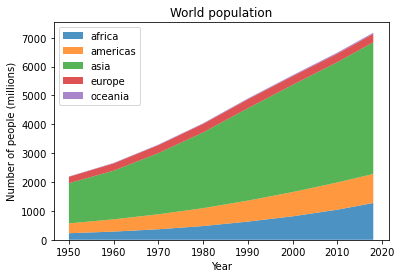

In [33]:
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}

fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

ValueError: need at least one array to concatenate

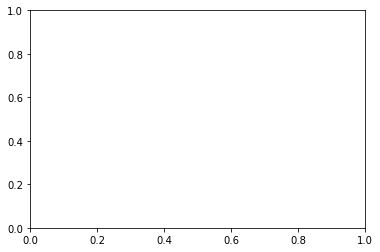

In [45]:
data_sorted= data.sort_values(by=['annual_percapita_kg1'],ascending=False)
data_sorted
waste_and_recycling = ['Waste','Recycling']
population_by_continent = {
    'United States': [809,280],
    'Denmark': [781,213],
    'New Zealand': [727,0],
    'Switzerland': [706,286],
    'Iceland': [656,366],
}
fig, ax = plt.subplots()
ax.stackplot(population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()
# waste = data_sorted['country','annual_percapita_kg1']
# waste
# us_waste = data_sorted['annual_percapita_kg2']
# population_by_continent = {
#     'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
#     'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
#     'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
#     'europe': [220, 253, 276, 295, 310, 303, 294, 293],
#     'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
# }


In [44]:
data_sorted= data.sort_values(by=['annual_percapita_kg1'],ascending=False)
data_sorted

,rank,country,waste_generated,annual_percapita_kg1,recycling,annual_percapita_kg2,incineration,annual_percapita_kg3,landfill,annual_percapita_kg4,open_dump,annual_percapita_kg5,Unnamed: 12,unaccounted waste,final_score
11,12,United States,5.00,809,5.10,280,0.42,104,2.93,425,0.00,0,0.00,0,65.29
25,26,Denmark,4.72,781,3.88,213,1.67,415,0.06,9,0.00,0,0.02,0,84.43
2,3,New Zealand,4.17,727,0.00,0,0.00,0,5.00,727,0.00,0,0.00,0,24.37
32,33,Switzerland,3.96,706,4.11,226,1.36,340,0.00,0,0.00,0,0.00,0,89.14
7,8,Canada,3.96,706,2.65,145,0.08,21,3.51,511,0.00,0,0.00,0,51.19
22,23,Iceland,3.45,656,6.67,366,0.12,30,3.31,481,0.00,0,0.00,0,80.10
9,10,Israel,3.34,644,2.93,161,0.00,0,3.33,483,0.00,0,0.00,0,57.35
30,31,Germany,3.22,633,5.51,303,0.79,198,0.01,1,0.00,0,1.86,13,87.32
15,16,Ireland,3.05,616,3.70,203,0.40,100,1.66,241,0.00,0,0.87,6,71.04
21,22,Luxembourg,2.96,607,3.14,172,0.85,212,0.76,111,0.00,0,0.26,2,80.01
